# Data Visualization

Being able to visualize your data is vital to being a data scientist. This generally involves making graphs or plots. More advanced techniques (beyond the scope of this notebook) include interactive graphics and dashboards.

We're going to focus on two different types of plotting ([Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) and [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)) but under the hood they're both matplotlib. There are other plotting libraries like [seaborn](https://seaborn.pydata.org/tutorial.html).

Here is a really quick but good [article](https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff) to read for getting started too.

In [1]:
import pandas as pd
import matplotlib as plt

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
data = pd.read_csv('../data/state_facts.tsv', delimiter='\t')

In [3]:
data.head()

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198956.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32197.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1660272,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197881,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


### Anatomy of a plot

Let's ignore the following code, butjust look at the resulting image.

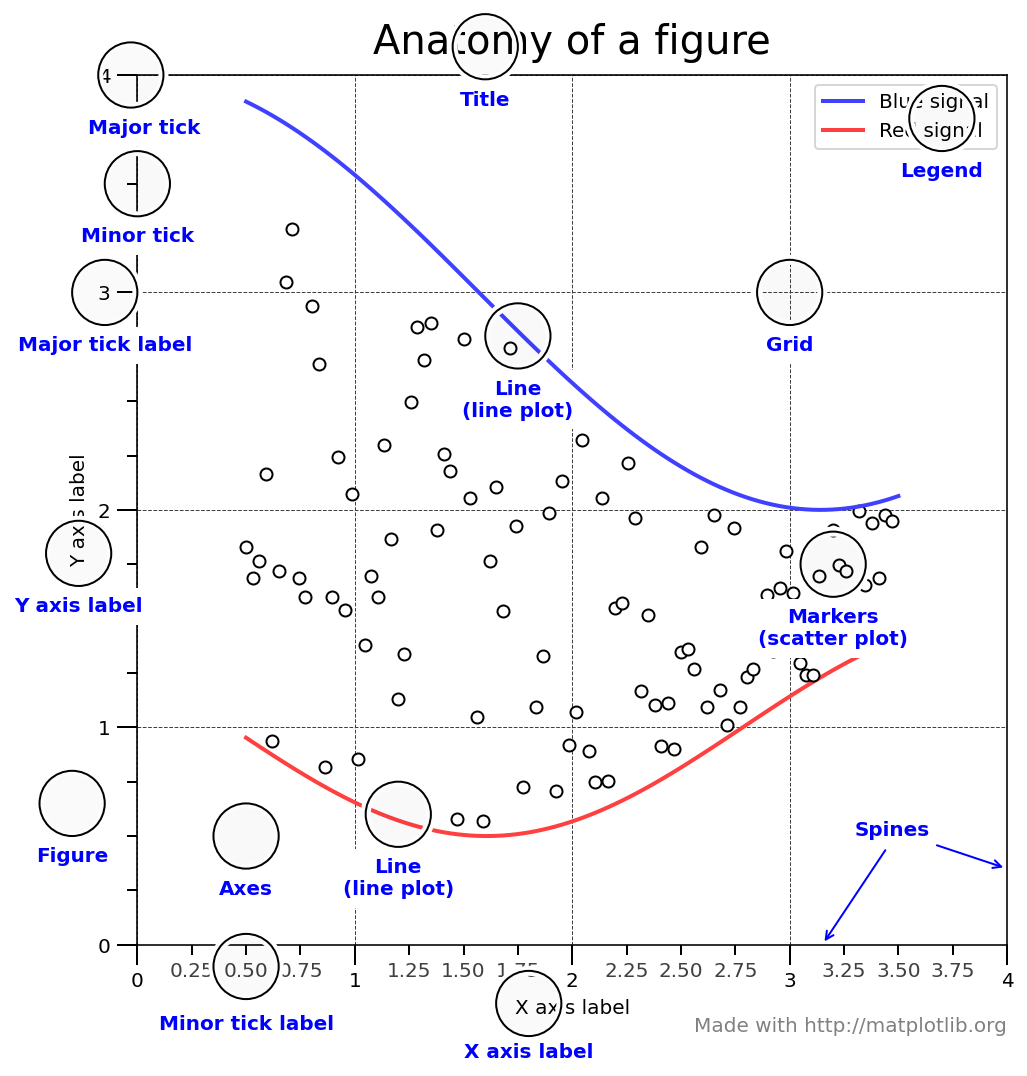

In [4]:
# This figure shows the name of several matplotlib elements composing a figure

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter


np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xycoords='data',
            xytext=(3.3, 0.5), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xycoords='data',
            xytext=(3.45, 0.45), textcoords='data',
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

There are a lot of elements that go into a plot. Let's start simpler

## Plotting with Pandas

Pandas makes plotting really easy. All we need to do is call the plot function. Done!

<AxesSubplot:>

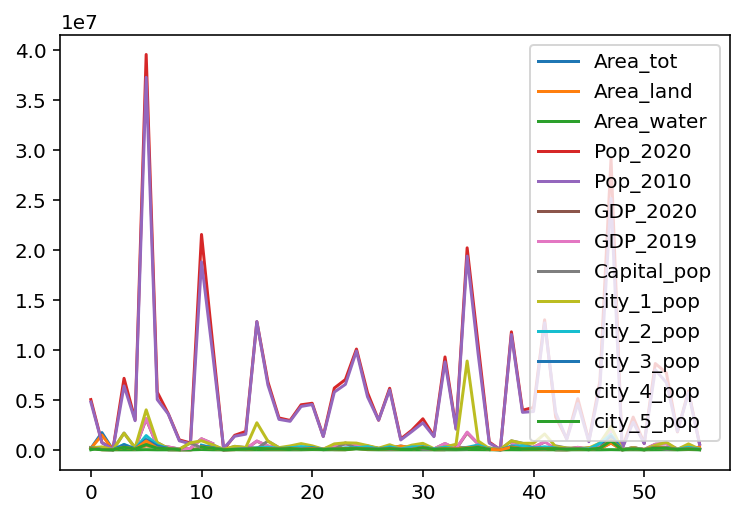

In [5]:
data.plot()

In [6]:
# data.plot(); # The ; can be used to hide the '<Text>' if you want.

Ok, so this plot isn't helpful. It is hard to read, it's not clear what is really being shown. Why is it a line graph? Let's dive into some options to improve this.

### Making a better plot

The first step to making a better plot is to isolate what we the question we are trying to answer and what type of plot we should make to answer that question. For this example, let's try to determine if there is a correlation between 2020 population and capital city population.

In [7]:
p1 = data[['USPS_code','Pop_2020','Capital_pop','city_1_pop']]

First let's just slice our data down to what we are interested in - populations by state

<AxesSubplot:>

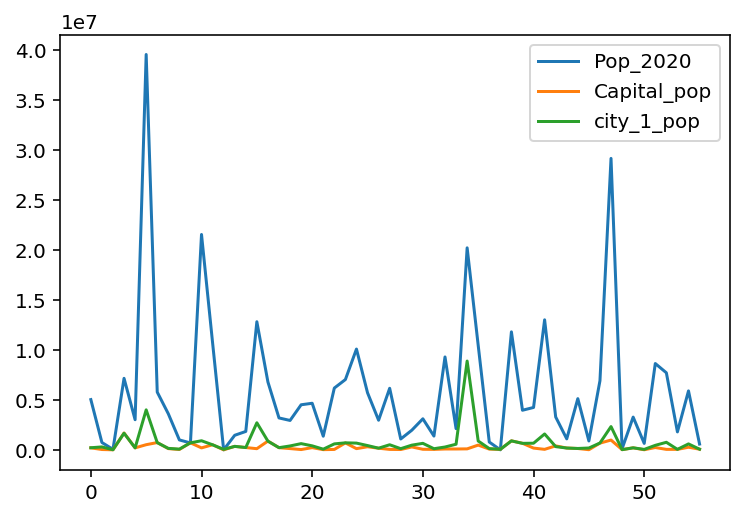

In [8]:
p1.plot()

This is a little better than our last attempt. At least now we can see all the lines, but this still doesn't help us answer our question.

Line graphs like this make a lot more sense if we are looking at trends in our data. Something like change over time. In our data set, change over state doesn't really mean much.

We could try a different type of plot. Maybe a bar graph would work?

<AxesSubplot:>

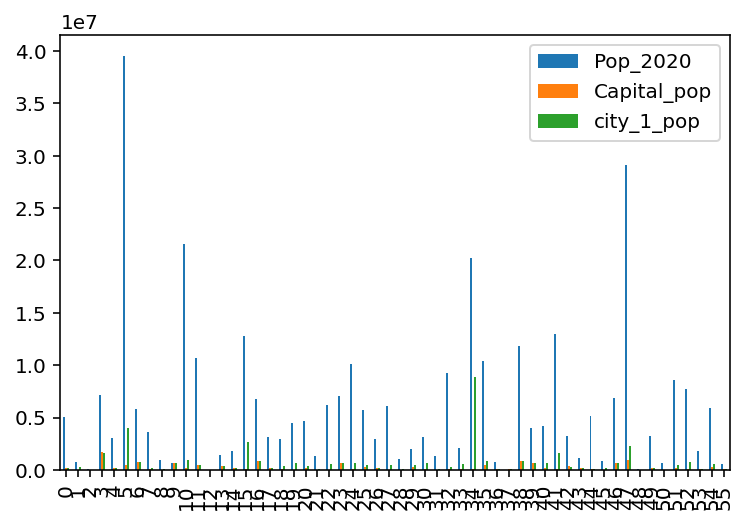

In [9]:
p1.plot(kind='bar')

Not much better at answering our question. Bar graphs are good for showing counts of things that are related but get hard to use when you have too many bars or the bars are vastly different in size.

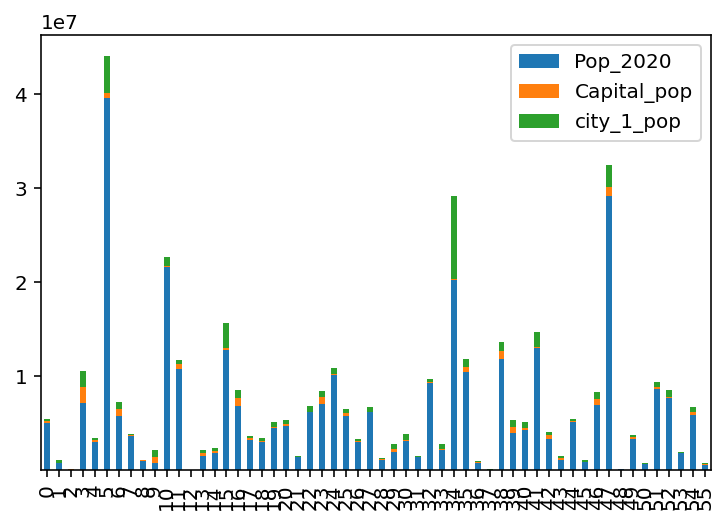

In [10]:
p1.plot.bar(stacked=True);

We could try stacking our bars. This is great if we are trying to show components of a total but not great for answering our question.

A cool use of a stacked bar would be to see which states have the most population in their top 5 cities.

<AxesSubplot:>

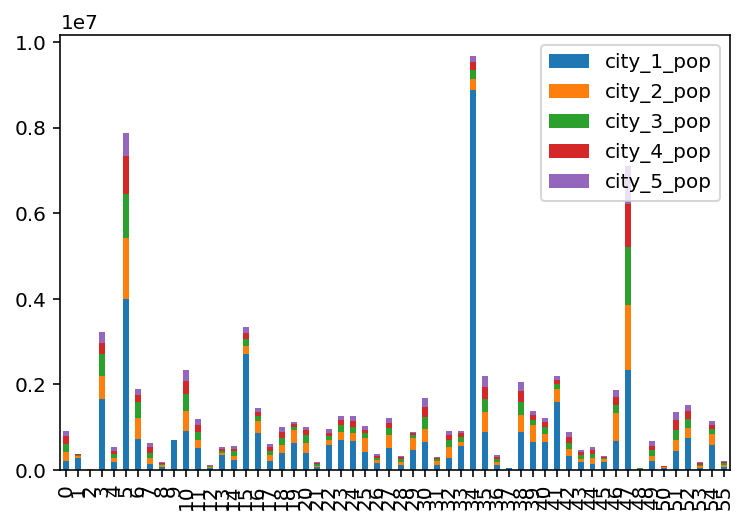

In [11]:
data[['USPS_code','city_1_pop','city_2_pop','city_3_pop','city_4_pop','city_5_pop']].plot.bar(stacked=True)

We could also make a pie chart. This would be good at telling us what fraction of a total we have but are't great at correlations.

<AxesSubplot:ylabel='Pop_2020'>

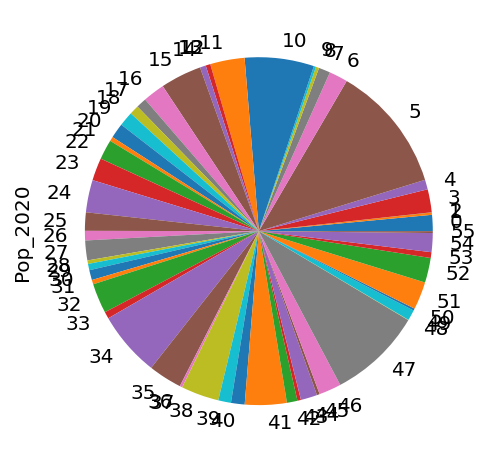

In [12]:
p1['Pop_2020'].plot.pie()

We could try a scatter plot. Why would make sense?

<AxesSubplot:xlabel='Pop_2020', ylabel='Capital_pop'>

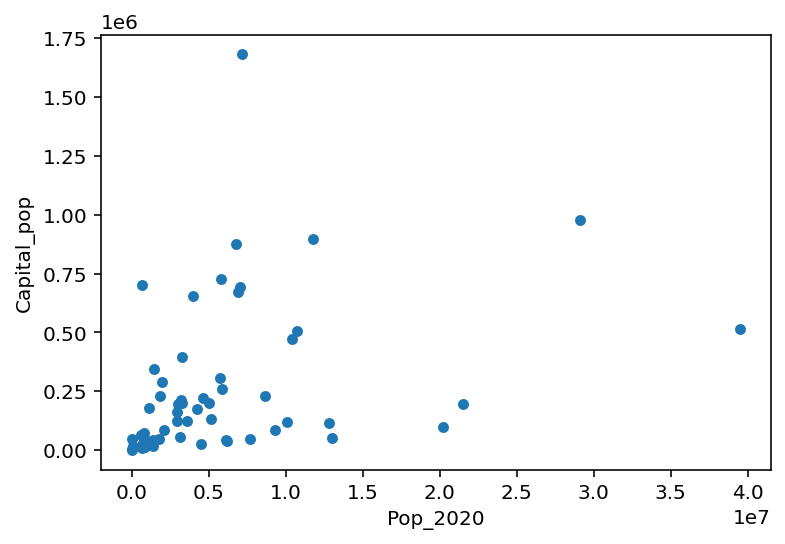

In [13]:
p1.plot.scatter(x='Pop_2020', y='Capital_pop')

### Adding Features

Now that we have a plot that we like, let's improve it to better describe our results.

<AxesSubplot:xlabel='Pop_2020', ylabel='Capital_pop'>

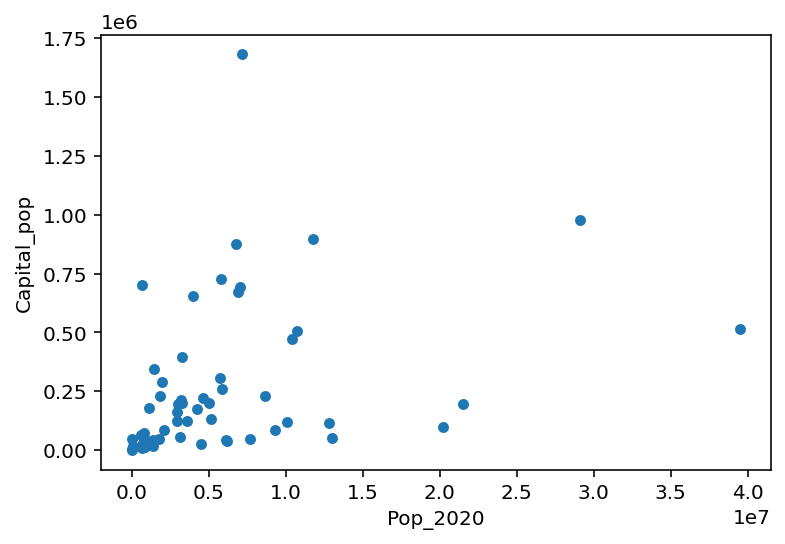

In [14]:
p1.plot.scatter(x='Pop_2020', y='Capital_pop')

#### Labels and Legends

<AxesSubplot:xlabel='Pop_2020', ylabel='Capital_pop'>

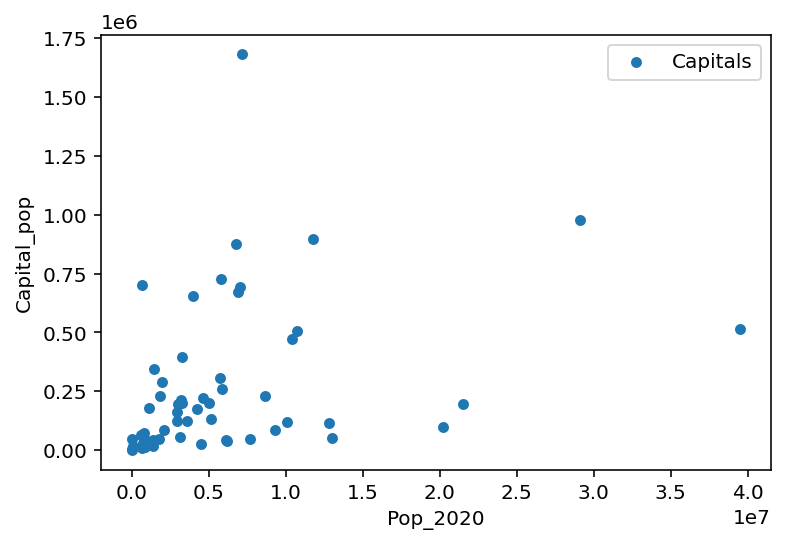

In [15]:
p1.plot.scatter(x='Pop_2020', y='Capital_pop', label='Capitals')

We can add labels to our plots using the label flag. We can also show/hide the legend using the legend flag. If you do this, you have to be careful that your data is well described elsewhere.

<AxesSubplot:>

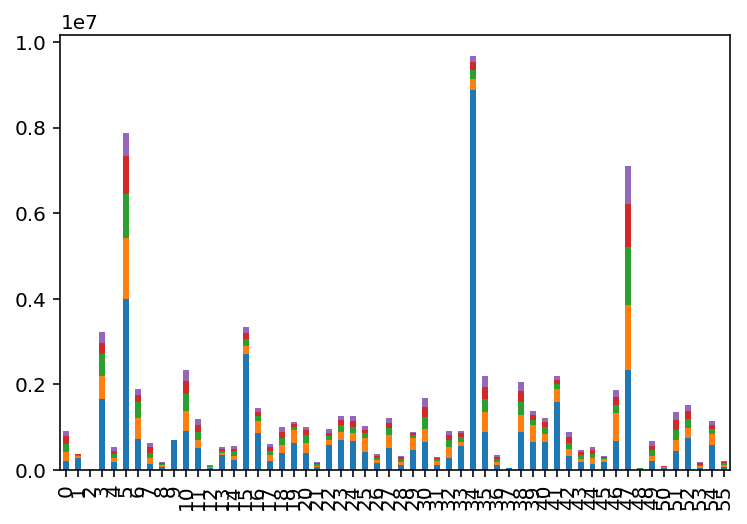

In [16]:
data[['USPS_code','city_1_pop','city_2_pop','city_3_pop','city_4_pop','city_5_pop']].plot.bar(stacked=True, legend=False)

#### Additional Data

Sometimes we'll want to plot multiple things on a single axis. To do that we have to use the axes option.

<AxesSubplot:xlabel='Pop_2020', ylabel='Capital_pop'>

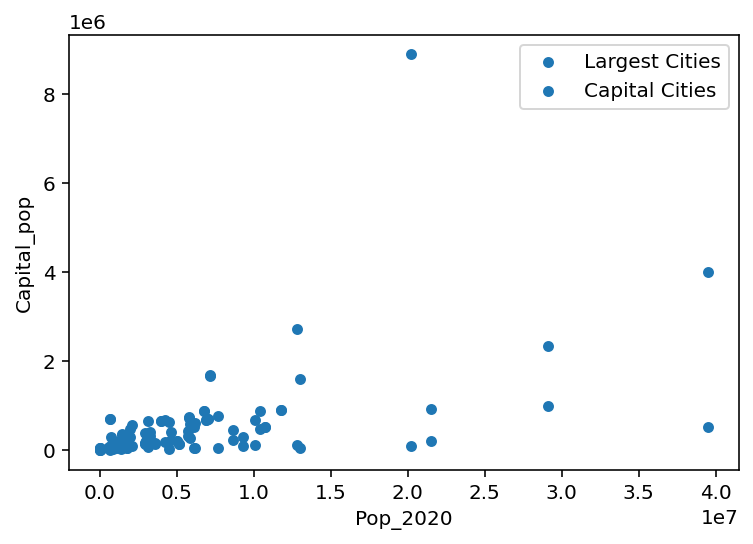

In [17]:
ax = data.plot.scatter(x='Pop_2020', y="city_1_pop", label="Largest Cities")
data.plot.scatter(x='Pop_2020', y='Capital_pop', label="Capital Cities", ax=ax)

What is wrong with this plot?

#### Color and Markers

You can specify colors by name ('red') or by letter ('b'). A full table of named python colors can be found [here](https://matplotlib.org/stable/gallery/color/named_colors.html).

<AxesSubplot:xlabel='Pop_2020', ylabel='Capital_pop'>

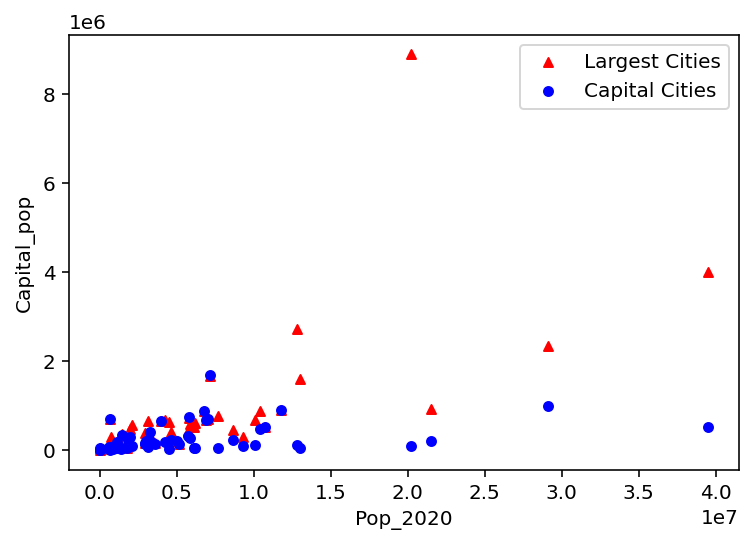

In [18]:
ax = data.plot.scatter(x='Pop_2020', y="city_1_pop", color='Red',label="Largest Cities", marker='^')
data.plot.scatter(x='Pop_2020', y='Capital_pop', color='b', label="Capital Cities", ax=ax)

Color is a powerful tool but doesn't work for everyone. Markers are a great tool you can use to supplement color.

You can also use something called a [colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html) to change the full color scheme of a plot.

Be careful when working with colormaps, they have a tendancy to overwhelm the goal of your plot.

<AxesSubplot:>

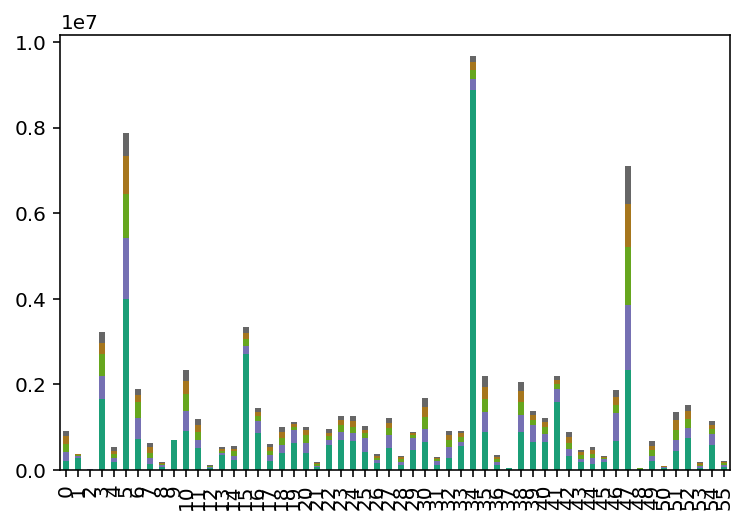

In [19]:
data[['USPS_code','city_1_pop','city_2_pop','city_3_pop','city_4_pop','city_5_pop']].plot.bar(stacked=True, legend=False, colormap="Dark2")

<AxesSubplot:ylabel='Pop_2020'>

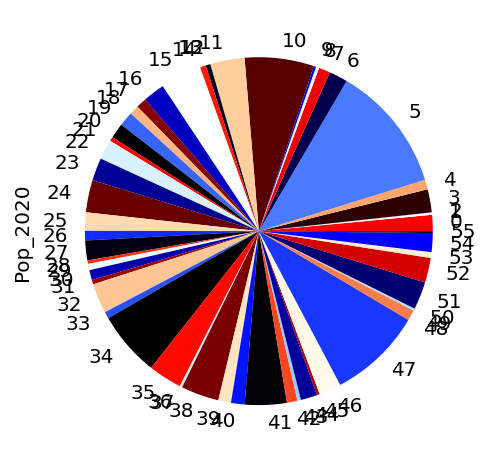

In [20]:
p1['Pop_2020'].plot.pie(colormap='flag')

#### Titles

You can add titles to both your axes and your overall graph.

<AxesSubplot:title={'center':'State and City Populations - 2020'}, xlabel='2020 State Population', ylabel='Population of Select Cities'>

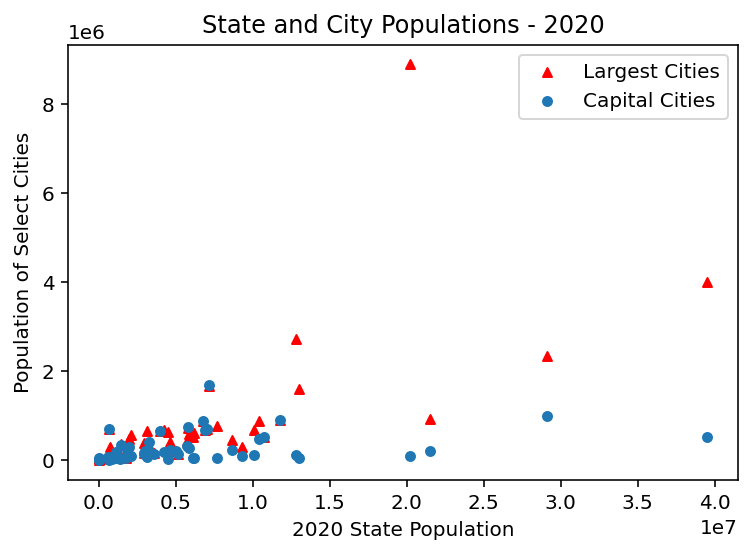

In [21]:
ax = data.plot.scatter(x='Pop_2020', y="city_1_pop", color='Red',label="Largest Cities", marker='^')
data.plot.scatter(x='Pop_2020', y='Capital_pop', label="Capital Cities", ax=ax, xlabel="2020 State Population", ylabel="Population of Select Cities", title='State and City Populations - 2020')

#### Grid

Sometimes (certainly not always) you'll want to add a grid to your graph for added specificity.

<AxesSubplot:title={'center':'State and City Populations - 2020'}, xlabel='2020 State Population', ylabel='Population of Select Cities'>

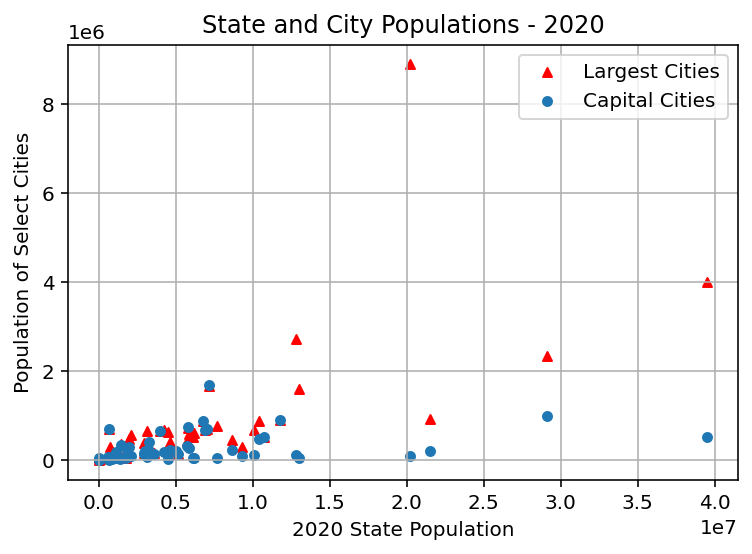

In [22]:
ax = data.plot.scatter(x='Pop_2020', y="city_1_pop", color='Red',label="Largest Cities", marker='^')
data.plot.scatter(x='Pop_2020', y='Capital_pop', label="Capital Cities", ax=ax, xlabel="2020 State Population", ylabel="Population of Select Cities", title='State and City Populations - 2020',grid=True)

#### Saving your plot

Once you have your plot the way you like it, you'll want to export it. There are multiple formats you can export in, but pdf and png are likely the ones you'll want to utilize.

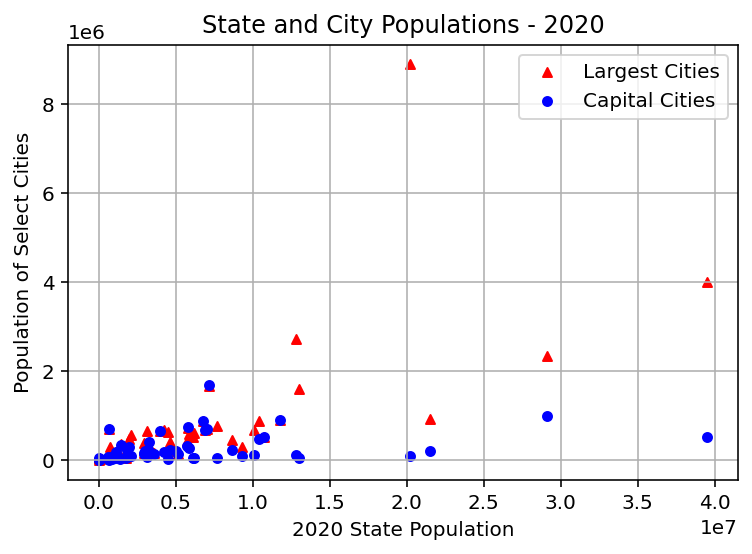

In [23]:
ax = data.plot.scatter(x='Pop_2020', y="city_1_pop", color='red',label="Largest Cities", marker='^')
plt = data.plot.scatter(x='Pop_2020', y='Capital_pop', color='blue',label="Capital Cities", ax=ax, xlabel="2020 State Population", ylabel="Population of Select Cities", title='State and City Populations - 2020',grid=True)

In [24]:
plt.figure.savefig('figure.pdf')

## Other plotting libraries

Matplotlib and Seaborn both have extensive and impressive catalogues of sample plots that I'd encourage you to explore and pull from

#### Matplotlib Examples

Here are some links to really cool matplotlib examples:

- [Matplotlib samples](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html)
- [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html)
- [50 cool plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
- [Matplotlib cheatsheet](https://github.com/rougier/matplotlib-cheatsheet)
- [Scientific Visualization with Matplotlib](https://github.com/rougier/scientific-visualization-book)

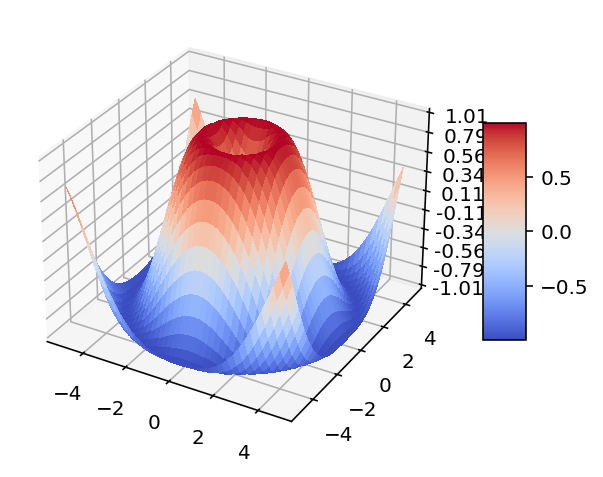

In [25]:

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

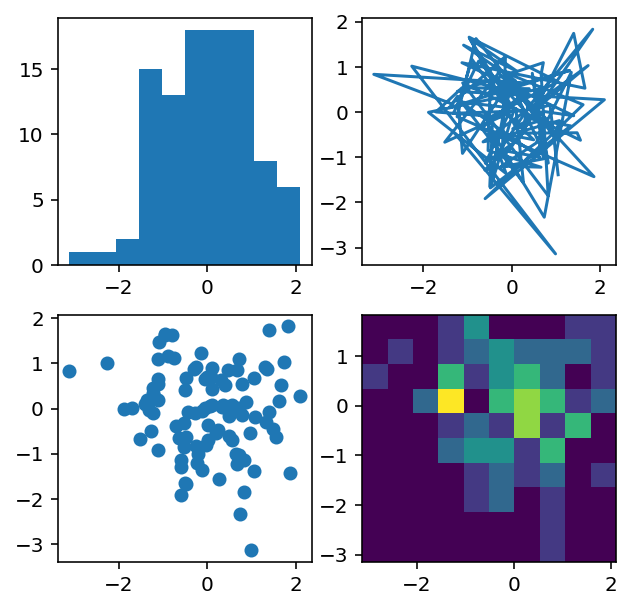

In [26]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

#### Seaborn Examples

Here are some links to really cool seaborn examples:

- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
- [Seaborn Guide](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

<AxesSubplot:>

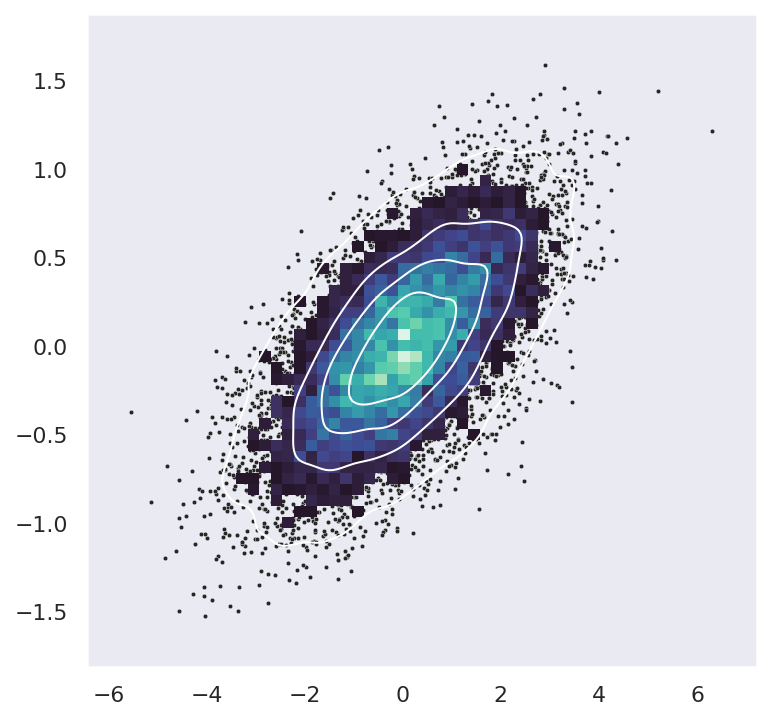

In [27]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

